# 03 Widgets and Interactive Data Analysis

This notebook is meant to show you some very recent developments in the iPython ecosystem that will likely revolutionize the way we work with data, interact with and evaluate mathematical functions and think about physics.

Created from the [widget documentation](http://nbviewer.ipython.org/github/ipython/ipython/blob/2.x/examples/Interactive%20Widgets/Index.ipynb) pages.

In [8]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Widgets

A new library available in iPython is the ability to create widgets, tools that allow you to interact with the notebook in useful ways.  This is a very new addition to iPython, so the doumentation is not as mature as other libraries, but that will rapidly change as more people use them.  For now, we'll explore a couple of different kinds of widgets to give you a sense for some of the possibilities and for how easy it is to create and use them.  For more info see [this talk](http://nbviewer.ipython.org/github/jakevdp/matplotlib_pydata2013/blob/master/notebooks/03_Widgets.ipynb) by Jake Vanderplas at the 2013 PyData conference.  

In [1]:
from IPython.html import widgets # Widget definitions
from IPython.display import display # Used to display widgets in the notebook

:0: FutureWarning: IPython widgets are experimental and may change in the future.


### A simple slider

In [2]:
mywidget = widgets.FloatSlider()
display(mywidget)

You can slide the slider back and forth and then "get" the current value from the `widget` object with:

In [3]:
print mywidget.value

0.0


Here's a variation on that where the current value is printed when the slider is moved.  Play around with it.

In [4]:
def on_value_change(name, value):
    print(value)

int_range = widgets.IntSlider(min=0, max=10, step=2)
int_range.on_trait_change(on_value_change, 'value')
display(int_range)

2
4
6
8
10
8
6
4


You may want to handle the input provided by a widget with a handler when someone interacts with a widget and then do something.  Try this one:

In [5]:
def click_handler(widget):
    print "clicked"

b = widgets.Button(description='Click Me!')
b.on_click(click_handler)
display(b)


clicked
clicked
clicked
clicked
clicked


## Interact/Interactive

`Interact` and `Interactive` are two other new tools that build on the widgets library to allow you to use Matplotlib to explore and visualize functions or data with varying parameters.

In [6]:
from IPython.html.widgets import interact, interactive

To use them, we define a function that creates a plot which depends on the values of parameters passed to the function.  Then you can create an `interact` object with the function and specified ranges for those parameters.  The `interact` object displayed will give you sliders (`widget`s) that let you vary the input parameters and interactively see how they change the plot!

### Linear optimizer

Here's a first example.  We have some data with error bars that we think should follow a straight line trend.  But which straight line?  Later on this quarter we will learn how algorithmic fitting of data optimizes the parameters of the function describing the data.  For now, we can use a human optimizer to find the best parameters for the data below with an `interact` object:

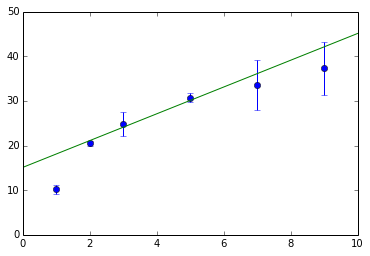

In [9]:
def linear_plot(m=0.5, b=27.0):
    '''
    Create a plot of some data that should
    vary linearly along with a straight line
    function with the given slope and intercept.
    '''
    #data to optimize
    datax = np.array([1.0,2.0,3.0,5.0,7.0,9.0])
    datay = np.array([10.2, 20.5, 24.8, 30.7, 33.6, 37.3])
    erry = np.array([1.0,0.5,2.6,1.0,5.6,6.0])
    #plot the data
    plt.errorbar(datax,datay,xerr=0.0,yerr=erry,fmt='o')
    #create a function to approximate the data using the slope
    #and intercept parameters passed to the function
    steps = 100
    x = np.linspace(0,10.,steps)
    y = m*x+b
    #plot and show the result
    plt.plot(x,y)
    plt.xlim(0.,10.)
    plt.ylim(0.,50.)
    plt.show()

#Create an interactive plot with sliders for varying the slope and intercept
v = interact(linear_plot,m=(0.0,5.0), b=(0.0,50.0))

**Spend a few minutes trying to find the "best fit" line to this data and record the corresponding slope and intercept values for that line in your notebook.**

### Random scatter

Here's another interactive plot that allows you to randomly sample (x,y) pairs within a circle of radius $r$.  The interact object lets you increase or decrease the number of samples in the circle.

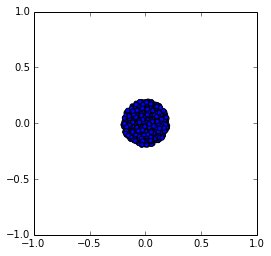

In [10]:
def scatter_plot(r=0.5, n=27):
    t = np.random.uniform(0.0,2.0*np.pi,n)
    rad = r*np.sqrt(np.random.uniform(0.0,1.0,n))
    x = np.empty(n)
    y = np.empty(n)
    x = rad*np.cos(t)
    y = rad*np.sin(t)
    fig = plt.figure(figsize=(4,4),dpi=80)
    plt.scatter(x,y)
    plt.xlim(-1.,1.)
    plt.ylim(-1.,1.)
    plt.show()
    
v2 = interact(scatter_plot,r=(0.0,1.0), n=(1,1000))

### Sinusoids

Here is an example with two sine curves - one is a pure sine wave, the other is the superposition of two waves with different frequency but the same amplitude.

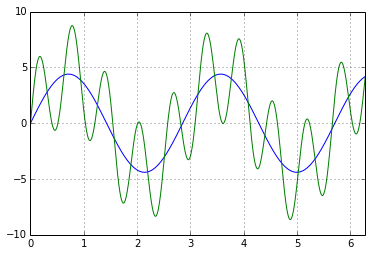

In [11]:
def sin_plot(A=5.0,f1=5.0,f2=10.):
    x = np.linspace(0,2*np.pi,1000)
    #pure sine curve
    y = A*np.sin(f1*x)
    #superposition of sine curves with different frequency
    #but same amplitude
    y2 = A*(np.sin(f1*x)+np.sin(f2*x))
    plt.plot(x,y,x,y2)
    plt.xlim(0.,2.*np.pi)
    plt.ylim(-10.,10.)
    plt.grid()
    plt.show()
    
v3 = interact(sin_plot,A=(0.,10.), f1=(1.0,10.0), f2=(1.0,10.0))

### Lissajous Curves

This one is a little more complicated.  Here we have a parametric plot.  We have two sinusoids, one in the $x$ direction and one in the $y$ direction, that both depend on a third parameter $t$.  We can set up the $t$ array and compute the values for $x$ and $y$ from their functional dependence on $t$, then plot $y$ vs. $x$.  The result when the two curves are sinusoidal is known as a [Lissajous](http://en.wikipedia.org/wiki/Lissajous_curve) curve, which forms interesting patterns when the combination of parameters are related in particular ways.

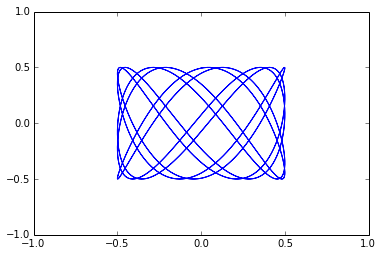

In [12]:
def lissajous_plot(a1=0.5,f1=1.,p1=0.,a2=0.5,f2=1.,p2=0.):
    t = np.linspace(0, 20*np.pi, 5000)
    x = a1*np.sin(f1*(t+p1))
    y = a2*np.cos(f2*(t+p2))
    plt.plot(x,y)
    plt.xlim(-1.,1.)
    plt.ylim(-1.,1.)
    plt.show()
    
v4 = interact(lissajous_plot,a1=(0.,1.), f1=(1.0,4.0), p1=(0.,2*np.pi),
                 a2=(0.,1.),f2=(1.0,4.0),p2=(0.,2*np.pi))

Try playing with the curves by adjusting the sliders to make interesting patterns.

**Record three parameter combinations that lead to interesting shapes, then create new static plots in other cells to show what they look like.**

---